In [1]:
from PIL import Image
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
images_path = []

for file in os.listdir('./testing-data/'):
    print(file)
    images_path.append(file)

cat-face-angry.jpg
cat-face-happy.jpg
cat-face-other.jpeg
cat-face-sad.jpg
cat2-face-angry.jpg
cat2-face-other.jpg
cat3-face-angry.jpg
cat3-face-other.jpg
dog-face-angry.jpg
dog-face-happy.jpg
dog-face-other.jpg
dog-face-sad.jpg
dog2-face-happy.jpg
dog2-face-sad.jpg
dog3-face-happy.jpg
dog3-face-sad.jpg
dog4-face-happy.jpg


In [3]:
images_path

['cat-face-angry.jpg',
 'cat-face-happy.jpg',
 'cat-face-other.jpeg',
 'cat-face-sad.jpg',
 'cat2-face-angry.jpg',
 'cat2-face-other.jpg',
 'cat3-face-angry.jpg',
 'cat3-face-other.jpg',
 'dog-face-angry.jpg',
 'dog-face-happy.jpg',
 'dog-face-other.jpg',
 'dog-face-sad.jpg',
 'dog2-face-happy.jpg',
 'dog2-face-sad.jpg',
 'dog3-face-happy.jpg',
 'dog3-face-sad.jpg',
 'dog4-face-happy.jpg']

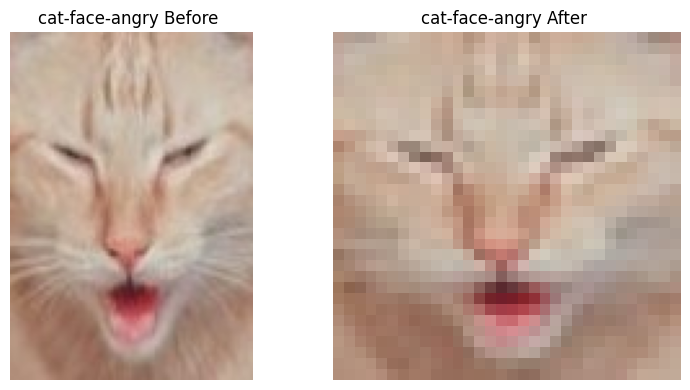

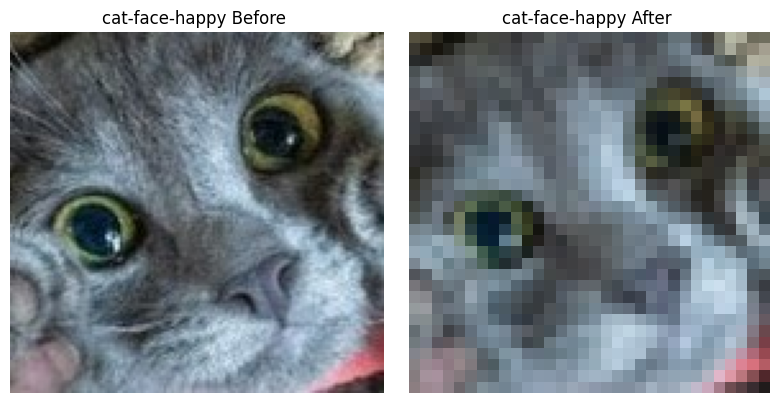

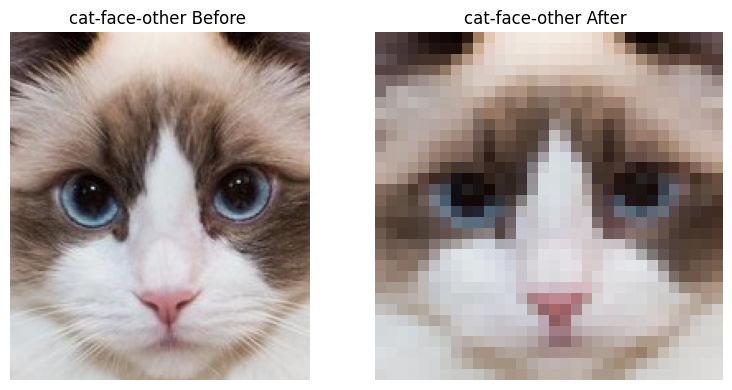

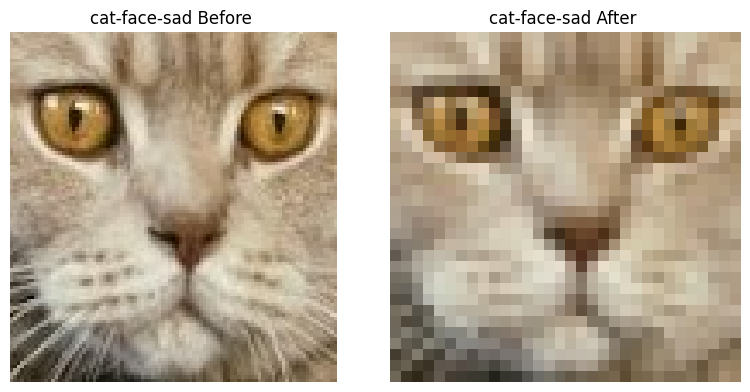

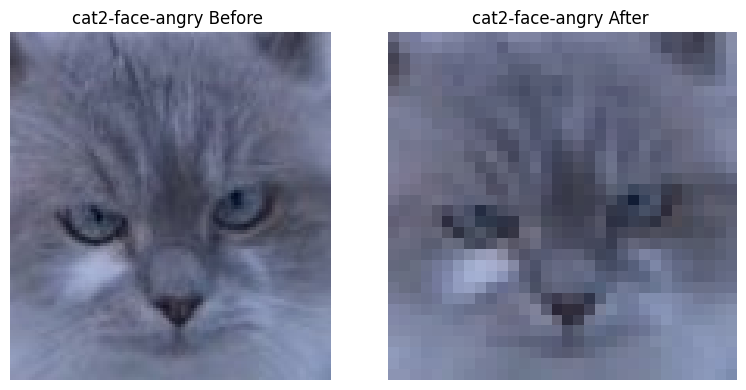

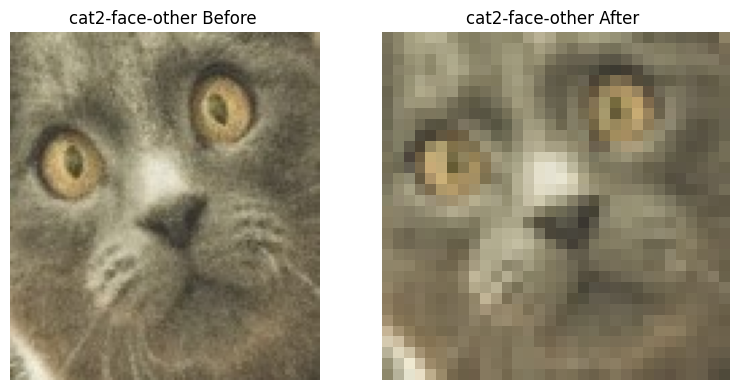

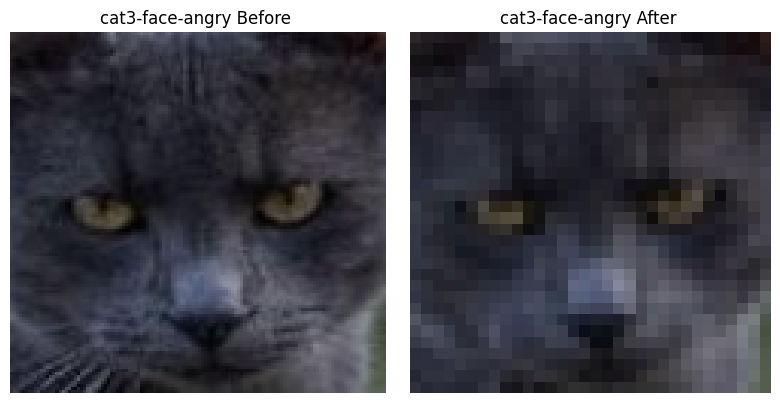

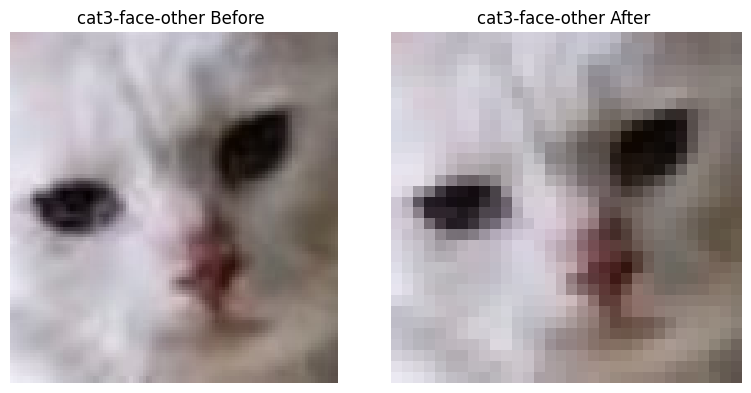

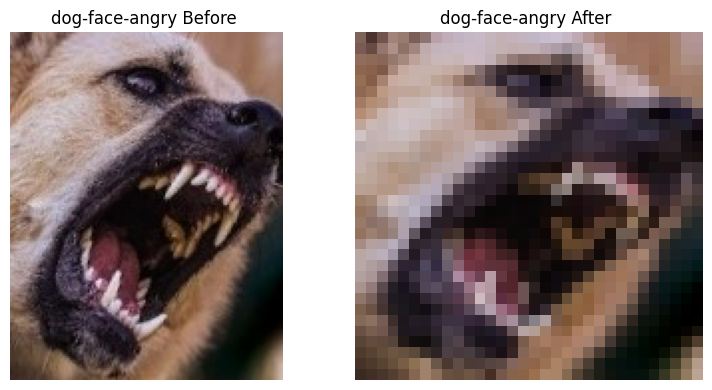

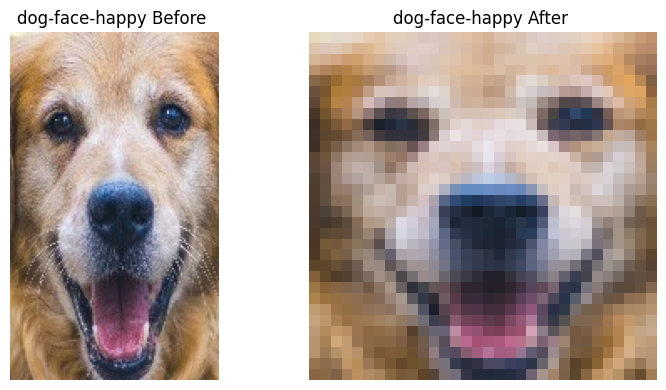

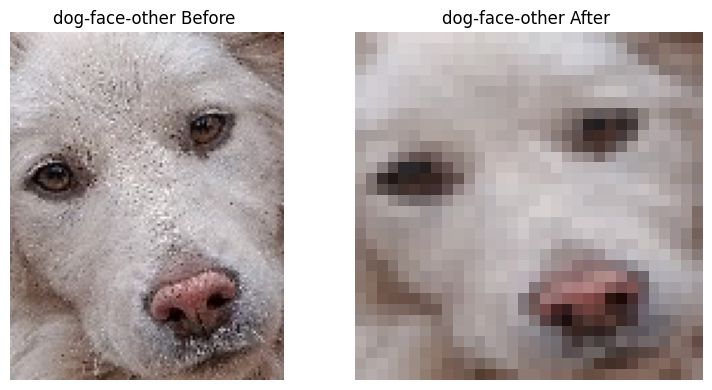

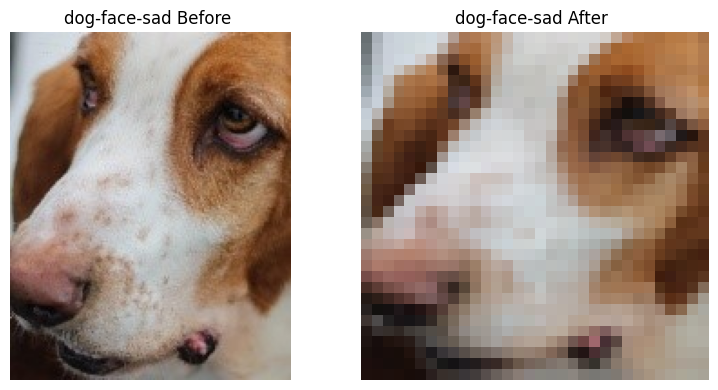

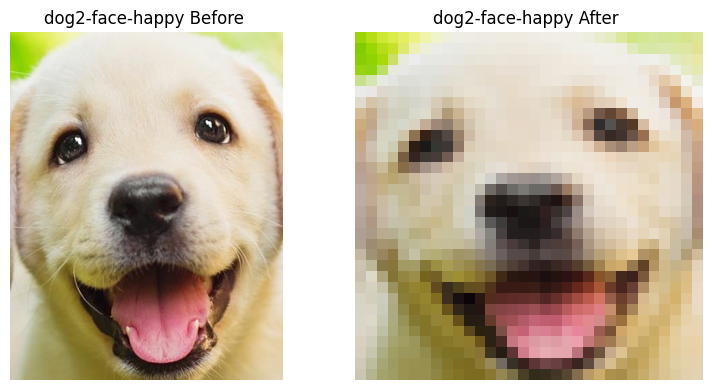

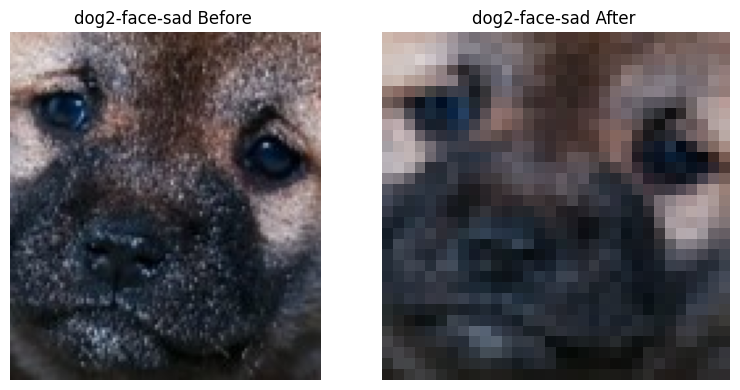

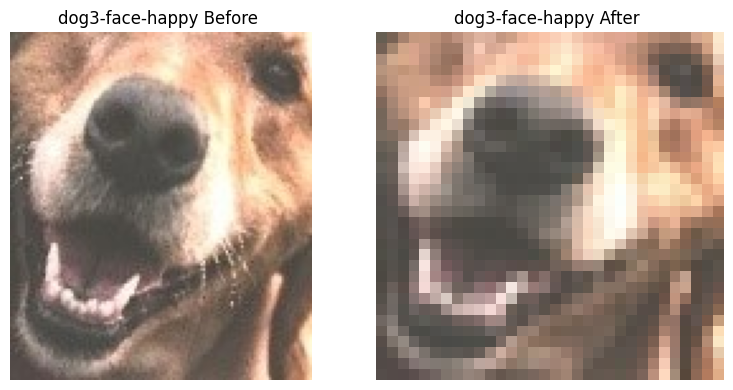

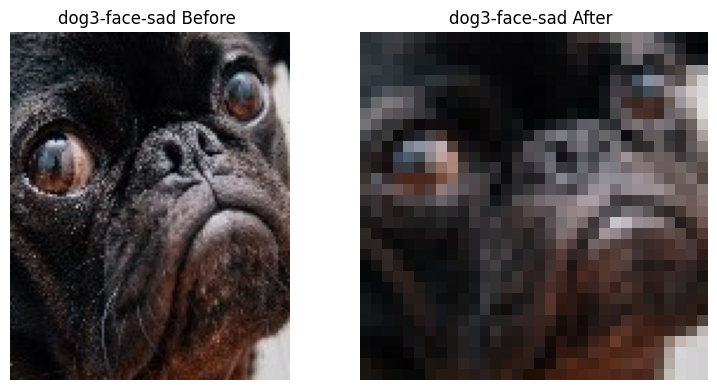

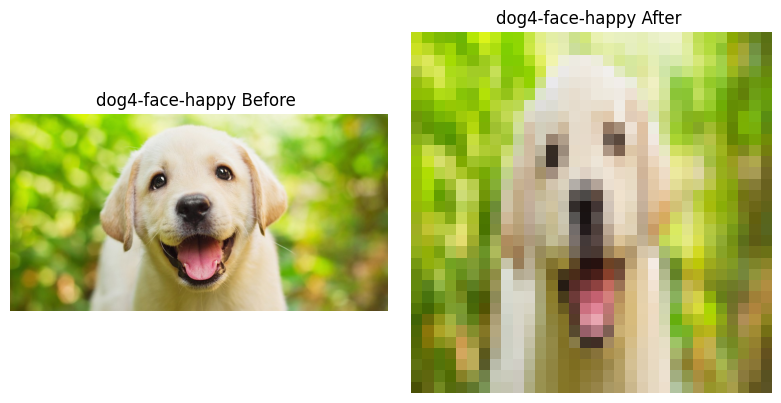

In [4]:
for image_path in images_path:
    img = Image.open(f"./testing-data/{image_path}")
    resized_img = img.resize((32, 32))

    # Menampilkan gambar sebelum resize
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"{image_path.split('/')[-1].split('.')[0]} Before ")
    plt.imshow(img)
    plt.axis('off')

    # Menampilkan gambar setelah 
    plt.subplot(1, 2, 2)
    plt.title(f"{image_path.split('/')[-1].split('.')[0]} After ")
    plt.imshow(resized_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [5]:

def calculate_ncdblbp_anticlockwise(image):
    gray, rows, cols, ncdlbp_anticlockwise = pre_lbp(image)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan berlawanan arah jarum jam mulai dari 9 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j - 1], gray[i, j - 1],
                         gray[i + 1, j - 1], gray[i + 1, j], gray[i + 1, j + 1],
                         gray[i, j + 1], gray[i - 1, j + 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            ncdlbp_anticlockwise[i, j] = code    
    return ncdlbp_anticlockwise

def pre_lbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape[0], gray.shape[1]
    pre_lbp = np.zeros((rows, cols), dtype=np.uint8)  
    return gray, rows, cols, pre_lbp

def process_image(image, data, label):
    # file_path = os.path.join(subfolder_path, file)
    # image_path = file_path
    # image = cv2.imread(image_path)
    
    temp_lbp = calculate_ncdblbp_anticlockwise(image)
    temp_lbp = temp_lbp.flatten()
    temp_lbp = temp_lbp.astype(object)
    temp_lbp = np.insert(temp_lbp, 0, label)
    data.append(temp_lbp)

In [6]:
data = []
ncdacs = []

for image_path in images_path:
    # try:
    label = image_path.split("-")[-1].split(".")[0]
    # print(label)
    img = Image.open(f"./testing-data/{image_path}")
    resized_img = img.resize((32, 32))
    resized_img = cv2.cvtColor(np.array(resized_img), cv2.COLOR_RGB2BGR)
    ncdac = calculate_ncdblbp_anticlockwise(resized_img)
    ncdacs.append(ncdac)

    process_image(resized_img, data, label)
    # except: 
    #     print(images_path)
    print(image_path, label)



cat-face-angry.jpg angry
cat-face-happy.jpg happy
cat-face-other.jpeg other
cat-face-sad.jpg sad
cat2-face-angry.jpg angry
cat2-face-other.jpg other
cat3-face-angry.jpg angry
cat3-face-other.jpg other
dog-face-angry.jpg angry
dog-face-happy.jpg happy
dog-face-other.jpg other
dog-face-sad.jpg sad
dog2-face-happy.jpg happy
dog2-face-sad.jpg sad
dog3-face-happy.jpg happy
dog3-face-sad.jpg sad
dog4-face-happy.jpg happy


In [7]:
df = pd.DataFrame(data)
df.shape

(17, 1025)

In [8]:
df.head()

0     1     2     3     4     5     6     7     8     9     ...  1015  \
0  angry     0     0     0     0     0     0     0     0     0  ...     0   
1  happy     0     0     0     0     0     0     0     0     0  ...     0   
2  other     0     0     0     0     0     0     0     0     0  ...     0   
3    sad     0     0     0     0     0     0     0     0     0  ...     0   
4  angry     0     0     0     0     0     0     0     0     0  ...     0   

   1016  1017  1018  1019  1020  1021  1022  1023  1024  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 1025 columns]

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

In [11]:
x = df.iloc[:,1:]
y = df.iloc[:,[0]]

y_encoded = pd.DataFrame(label_encoder.fit_transform(y))
x = pd.DataFrame(scaler.fit_transform(x))

combined_df = pd.concat([x, y_encoded], axis=1)

c:\ProgramData\anaconda3\envs\mdl\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
combined_df.head()

0     1     2     3     4     5     6     7     8     9     ...  1015  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1016  1017  1018  1019  1020  1021  1022  1023  0     
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     1  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     2  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     3  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0  

[5 rows x 1025 columns]

In [13]:
combined_df = combined_df.loc[:, (combined_df != 0).any(axis=0)]
combined_df.head()

33        34        35        36        37        38        39   \
0 -0.584534 -0.720209 -0.467747  0.584915  0.654087  0.003926 -1.567890   
1  0.389958 -0.187881  0.052563 -0.276621 -0.248830 -0.997318  1.322457   
2 -1.806080 -1.498227 -0.626102 -0.970636 -0.966216 -0.142923  1.287493   
3 -1.408048 -1.102393  0.833029  0.572950  1.420948  1.232119 -0.518973   
4  0.417409  0.740282  0.878273 -0.144997  0.728300 -0.049473  0.669798   

        40        41        42   ...       982       983       984       985  \
0 -1.158741  1.064612 -2.045473  ...  1.187072 -1.807673 -1.975546 -0.490086   
1 -1.225403  1.064612 -0.591729  ... -0.483016 -0.338489 -0.481766  0.968824   
2  1.263309  0.878988  1.069693  ... -0.394450 -0.314002 -0.481766 -0.574486   
3 -1.314286 -1.892124 -0.189353  ...  0.427941  0.543022 -0.365870  0.378026   
4 -1.414279 -0.194984  1.264391  ...  1.199724  1.130696  1.063522  0.884424   

        986       987       988       989       990  0    
0 -0.331987 -0.425160 -0.622994  1.004318  1.306535    0  
1  0.658555 -1.640634 -1.897512 -0.360105 -0.010282    1  
2 -0.262880  1.050772  0.730476 -0.637820 -0.278307    2  
3 -0.136183 -0.001915  0.899660 -0.613671 -1.024115    3  
4  0.946503  0.790313  0.730476  0.533411 -1.455285    0  

[5 rows x 901 columns]

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb 

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101

from tensorflow.keras import layers, Model


In [15]:
lda = LinearDiscriminantAnalysis(n_components=3)

X = combined_df.iloc[:,:-1]
y = combined_df.iloc[:,-1:]

X_lda = lda.fit_transform(X, y)

c:\ProgramData\anaconda3\envs\mdl\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
X_lda

array([[ 0.33180087,  0.02204306,  1.24325932],
       [-0.18217566, -0.53060158,  2.0365978 ],
       [-1.52495462,  1.36235735, -0.0897132 ],
       [-0.48976412, -0.84687008,  0.67805969],
       [ 0.82377276,  0.887526  , -0.19737422],
       [ 0.09469949, -1.34117292, -0.95041951],
       [-1.1710245 ,  1.05357603,  0.15722964],
       [ 1.86521879,  1.1686296 ,  0.65945646],
       [-0.92357762, -0.66430008, -1.32405426],
       [-0.60487591,  0.46671132, -0.42198259],
       [ 1.1925805 , -1.18697848, -0.13383869],
       [ 1.69639536,  0.94193086, -1.17343994],
       [-0.14809641, -0.27281261, -0.96918194],
       [-0.29697769, -0.40851386,  0.82767585],
       [-0.52437365,  0.58898872, -0.65689803],
       [-0.32579266,  0.24481317,  0.52342447],
       [ 0.18714506, -1.48532652, -0.20880086]])

In [17]:
y = combined_df.iloc[:,-1:]
y.value_counts()

1    5
0    4
2    4
3    4
dtype: int64

In [18]:
y

0
0   0
1   1
2   2
3   3
4   0
5   2
6   0
7   2
8   0
9   1
10  2
11  3
12  1
13  3
14  1
15  3
16  1

In [19]:
from tensorflow.keras.models import load_model


In [20]:
model = load_model("./models/resnet.h5")
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 reshape_6 (Reshape)            (None, 3, 1)         0           ['input_7[0][0]']                
                                                                                                  
 dense_62 (Dense)               (None, 3, 64)        128         ['reshape_6[0][0]']              
                                                                                                  
 batch_normalization_15 (BatchN  (None, 3, 64)       256         ['dense_62[0][0]']               
 ormalization)                                                                              

In [21]:
pred = model.predict(X_lda)
pred = np.argmax(model.predict(X_lda), axis=1)
pred

1/1 [==============================] - 0s 22ms/step


array([3, 3, 0, 3, 2, 1, 0, 2, 1, 1, 3, 2, 1, 3, 1, 2, 3], dtype=int64)

In [22]:
label_map = {
    0: "angry",
    1: "happy",
    2: "other",
    3: "sad"
}

In [23]:
true_y = y.values.flatten().tolist()
true_y

[0, 1, 2, 3, 0, 2, 0, 2, 0, 1, 2, 3, 1, 3, 1, 3, 1]

In [24]:
pred = [label_map[val] for val in pred]
true_y = [label_map[val] for val in true_y]
true_y

['angry',
 'happy',
 'other',
 'sad',
 'angry',
 'other',
 'angry',
 'other',
 'angry',
 'happy',
 'other',
 'sad',
 'happy',
 'sad',
 'happy',
 'sad',
 'happy']

In [25]:
ncdacs[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 120,  88, ..., 124,  60,   0],
       [  0,   0,   4, ...,   0,   4,   0],
       ...,
       [  0,  54,  62, ..., 248, 112,   0],
       [  0,  98,  32, ..., 248, 248,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

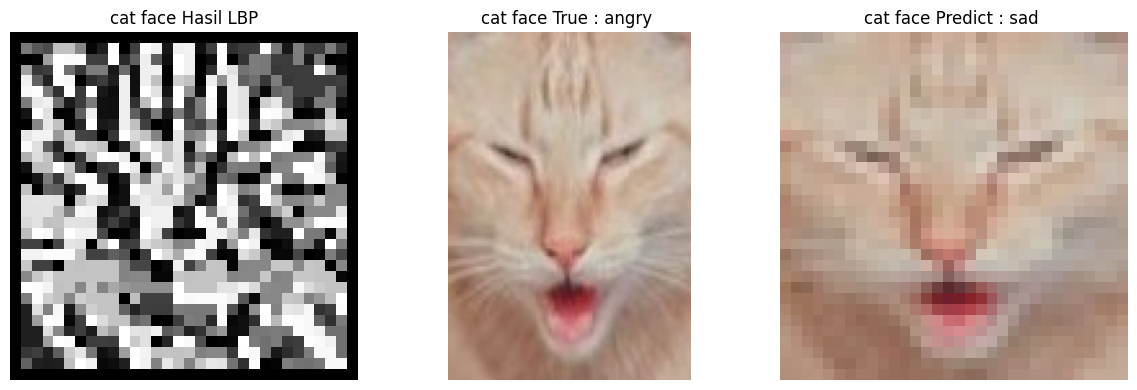

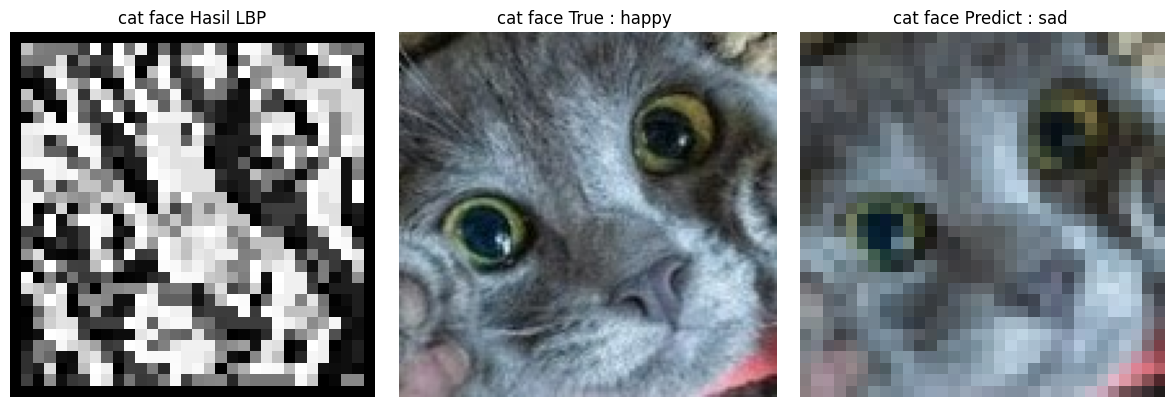

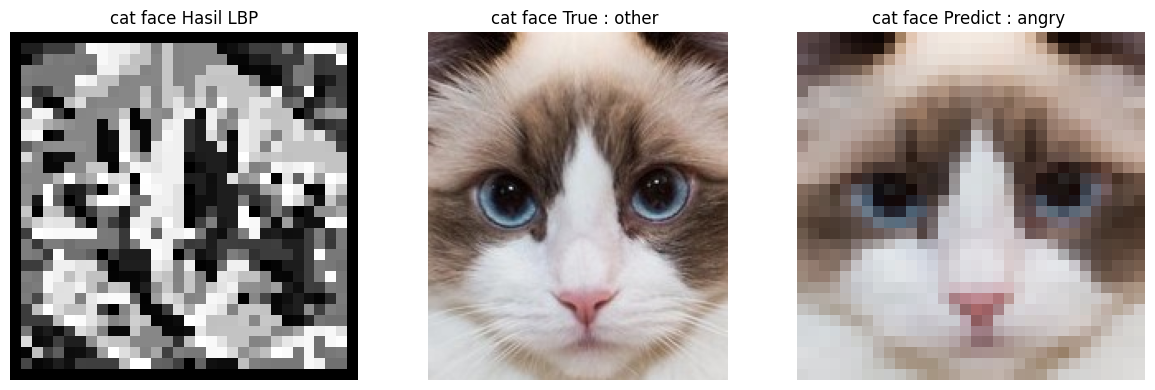

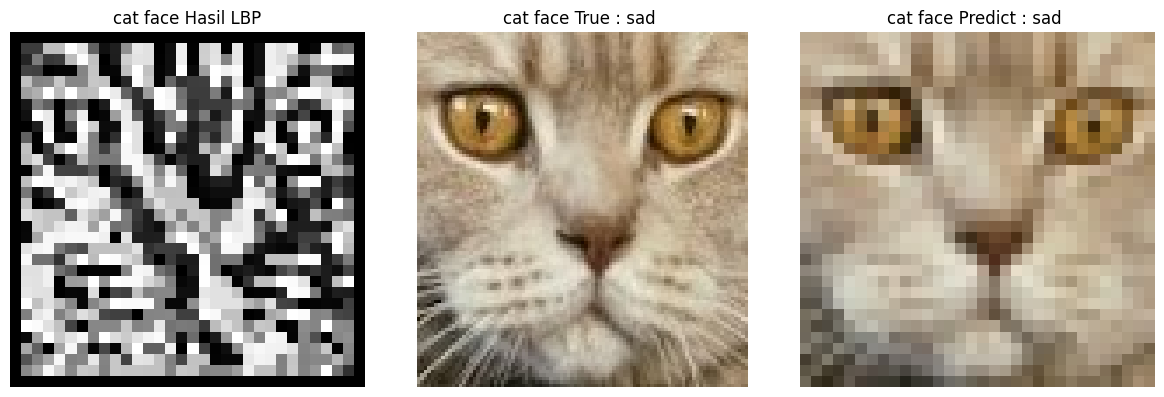

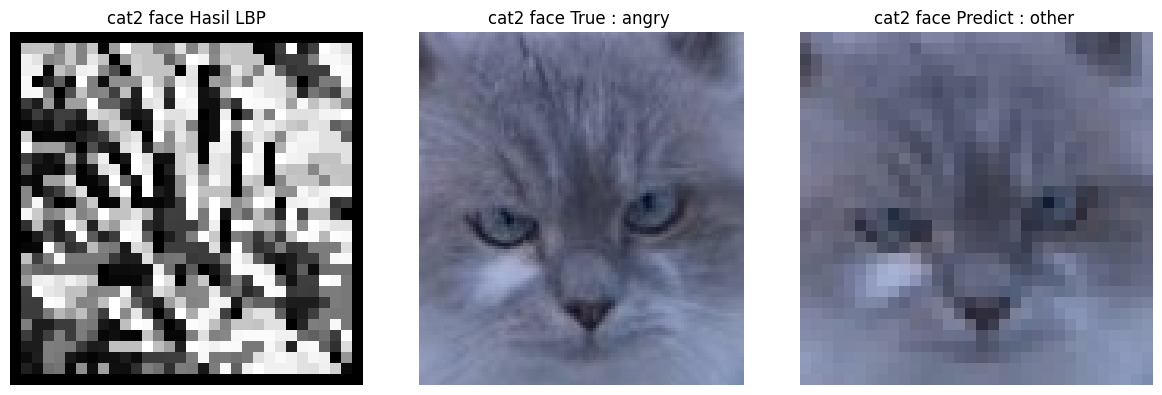

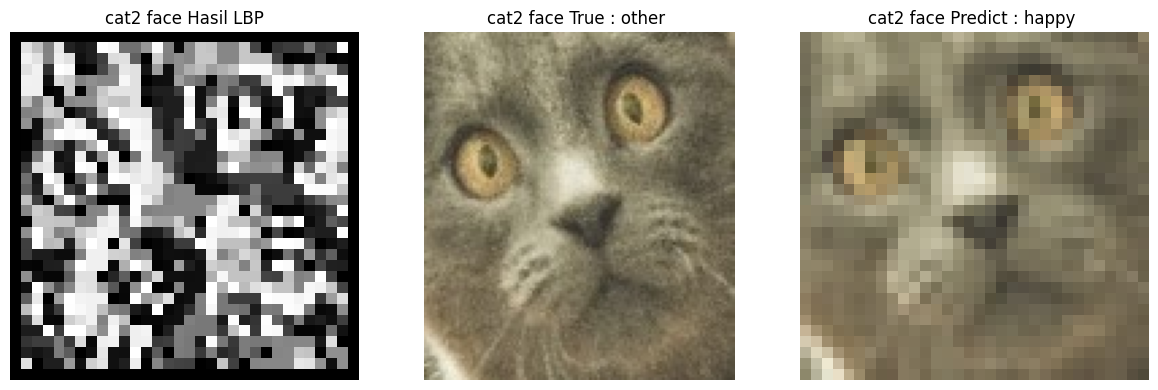

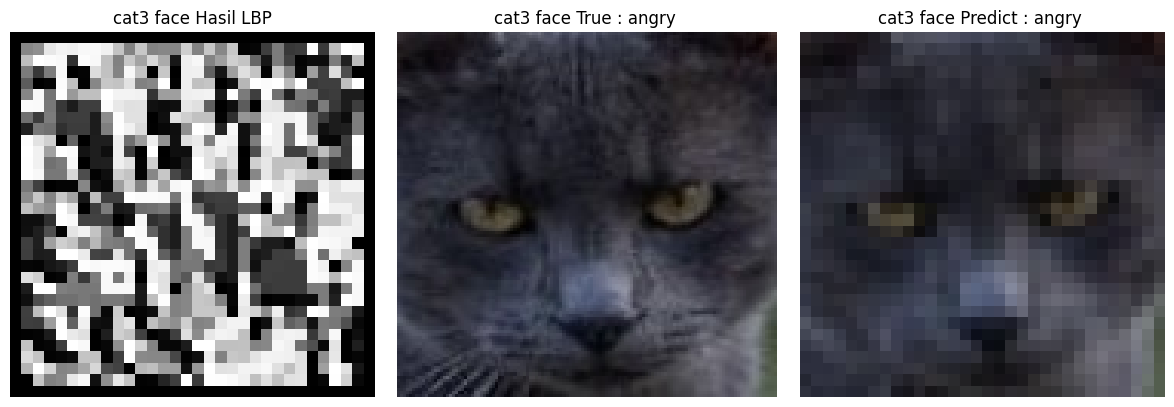

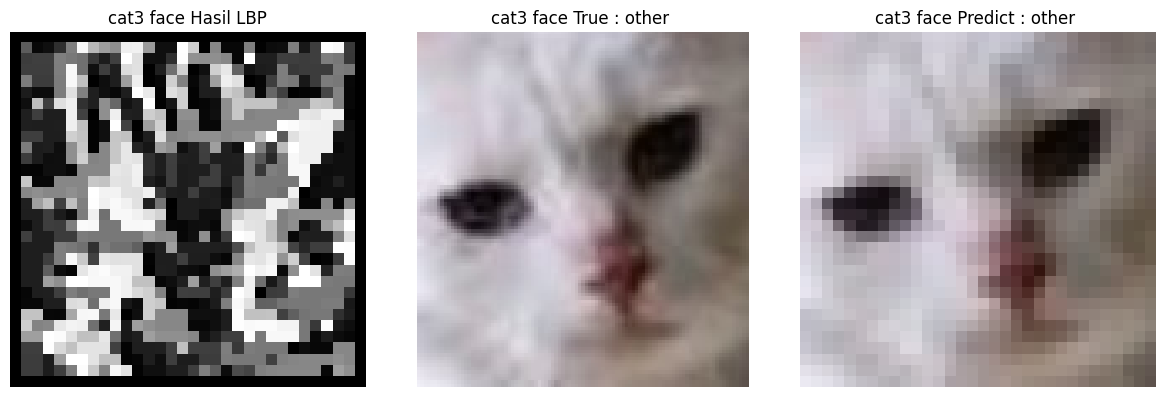

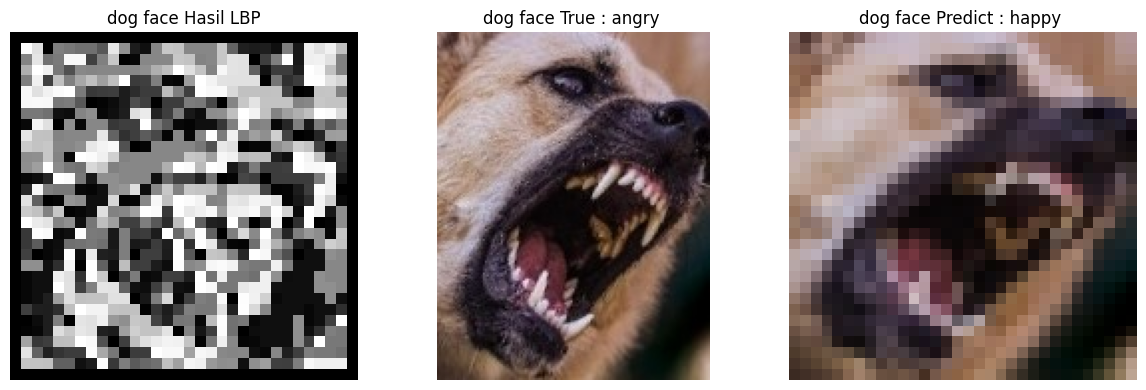

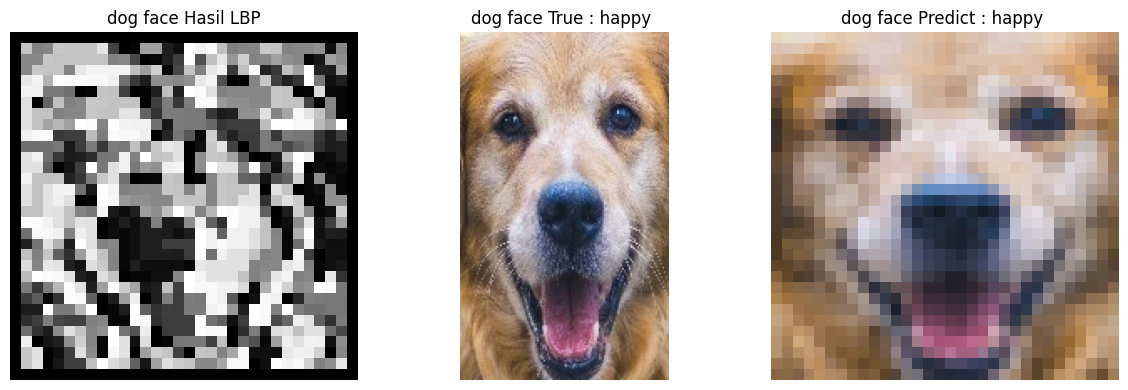

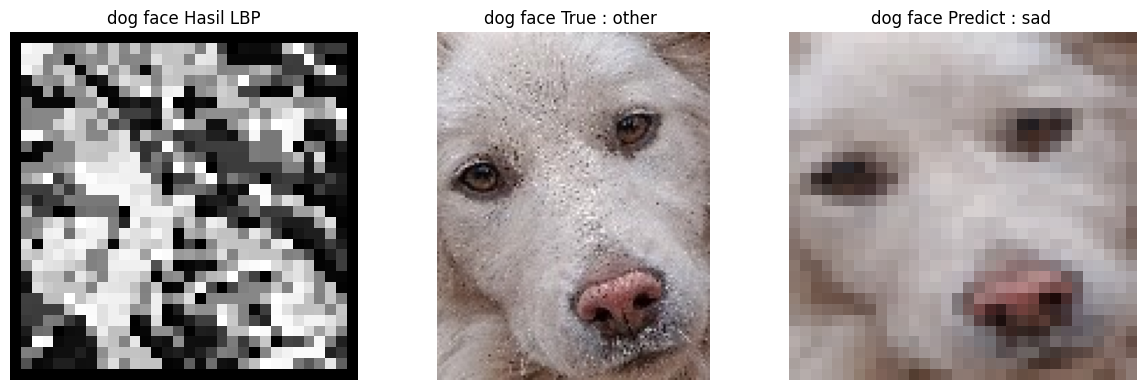

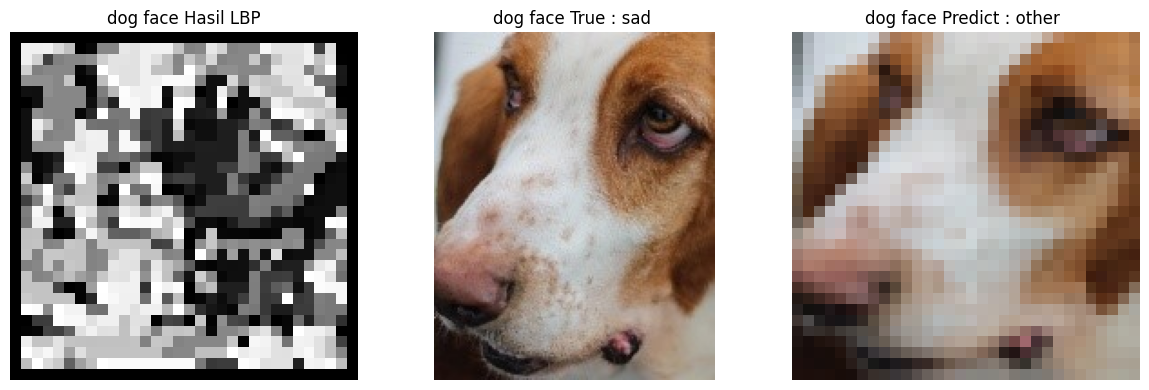

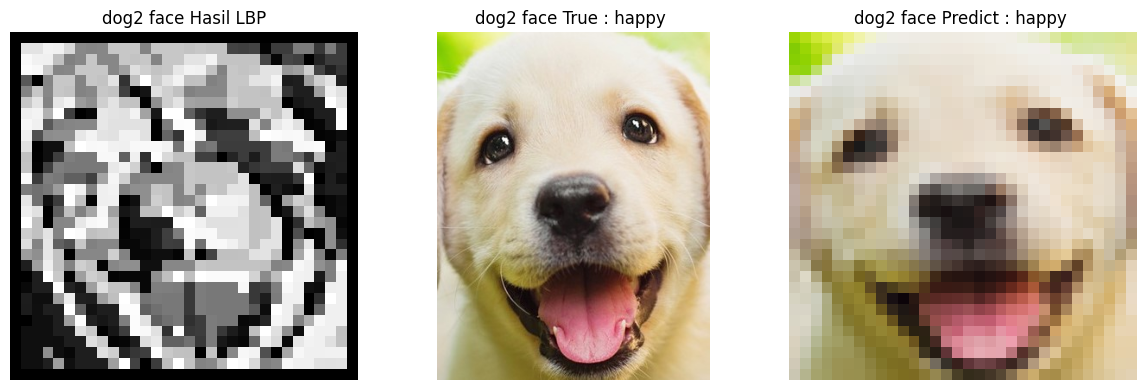

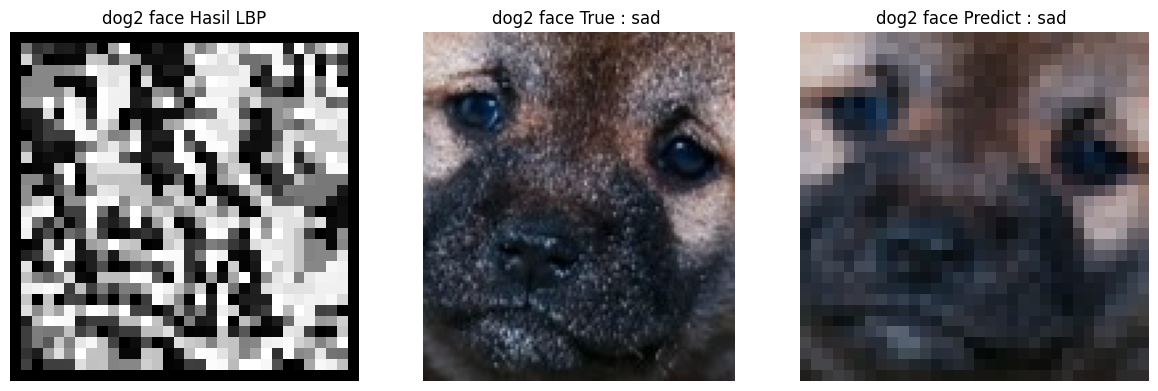

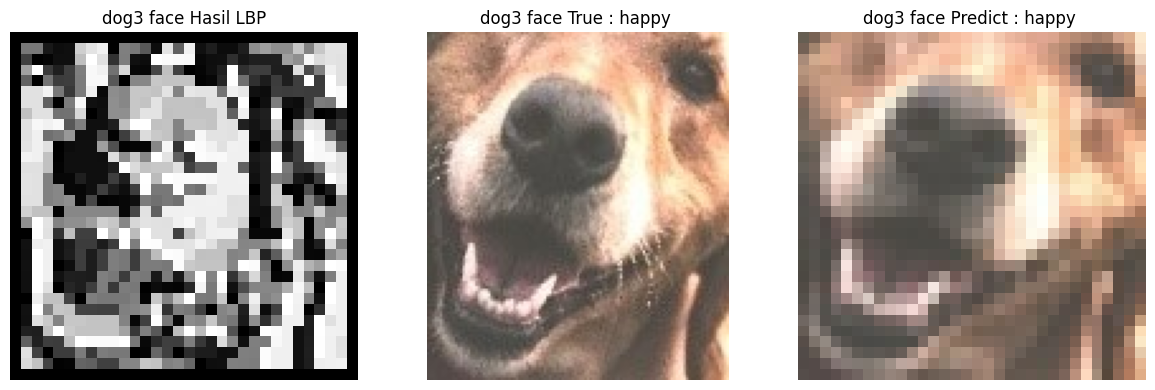

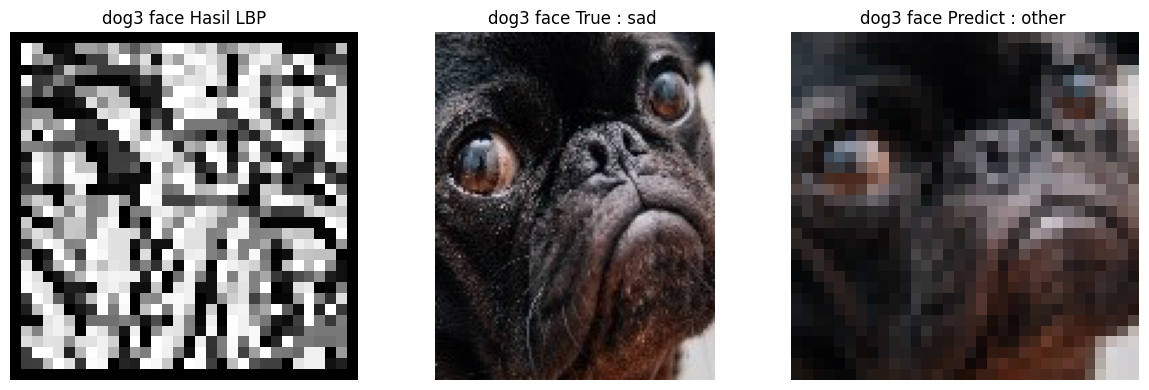

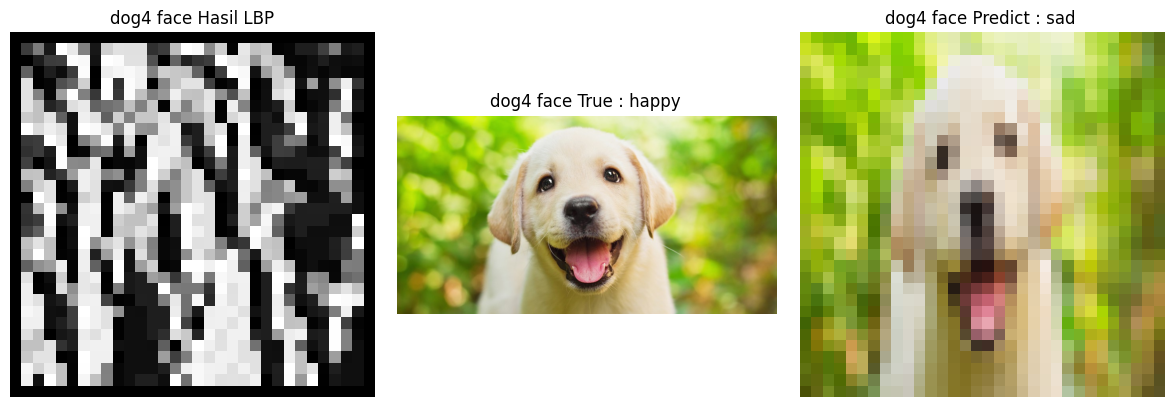

In [26]:
for i, image_path in enumerate(images_path):
    img = Image.open(f"./testing-data/{image_path}")
    resized_img = img.resize((32, 32))

    file_name = image_path.split('/')[-1].split('.')[0].split('-')[:-1]
    file_name = " ".join(file_name)
    
    # Menampilkan gambar sebelum resize
    plt.figure(figsize=(12, 4))

    # Menampilkan hasil LBP
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(ncdacs[i], cv2.COLOR_BGR2RGB))
    plt.title(f"{file_name} Hasil LBP")
    plt.axis('off')


    plt.subplot(1, 3, 2)
    plt.title(f"{file_name} True : {true_y[i]} ")
    plt.imshow(img)
    plt.axis('off')

    # Menampilkan gambar setelah resize
    plt.subplot(1, 3, 3)    
    plt.title(f"{file_name} Predict : {pred[i]} ")
    plt.imshow(resized_img)
    plt.axis('off')



    plt.tight_layout()
    plt.show()
